#ANALYSIS OF NATIONAL PARK TRAILS
###by Alyssa Diaz

September 2022

**Data source:**


Kaggle: "*National Park Trails:*
Every trail in the National Parks Service gathered from alltrails.com"
(https://www.kaggle.com/datasets/planejane/national-park-trails)



"All of these variables were extracted directly off of the json from each trail's web page by state. I went ahead and uploaded the code I used to scrape the trail data for you to take a look: https://github.com/j-ane/trail-data " 

-by creator of dataset "plane_jane"

(last updated April 30, 2020)



**Goals:**

*  Analyze what make a hike difficult
  *   Why considered difficult: mostly length, elevation, terrain?

*  Explore possible correlations between:
  *	 Steepness and difficulty rating
  *  Elevation and difficulty rating
  *  Length and difficulty rating
  *  User rating and difficulty rating


**Why?**
  *   for hikers/app users: have a better understanding of what they will face difficulty-wise on a hike (higher enjoyment and safety)
  *   for AllTrails: have a more finely honed and objective rating system in place (higher reliability=higher customer satisfaction)
  *    for National Parks/any parks: more safe if AllTrails app users hiking in park have complete information with which to plan their hikes

**Variable definitions (as per AllTrails app):**


*   Difficulty: determined by distance, elevation gain, and terrain (easy, moderate, hard)
*   Visitor usage: amount of trail traffic (light, moderate, heavy)
*   Features: combination of suitability (accessibility and kid/dog friendly), and attractions (natural features, types of scenery)
*   Popularity (per email response from AllTrails): "a combination of some of the other stats (star rating, # of activities, # of photos/reviews, etc)...but unable to share the exact weighting of each."

### **INITIAL DATA OVERVIEW**
*   Uploaded libraries and imported dataset
*   Displayed data overviews: 
  *   Distribution of data
  *   Data types
  *   Lists and totals of unique values


In [1]:
# Import libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Define dataframe: AllTrails hikes in US National Parks
#  Source: Kaggle
hikes_df = pd.read_csv('https://raw.githubusercontent.com/AlyMDiaz/AllTrailsHikes/main/AllTrails_hikes.csv')

hikes_df.head()

,trail_id,name,area_name,city_name,state_name,country_name,_geoloc,popularity,length,elevation_gain,difficulty_rating,route_type,visitor_usage,avg_rating,num_reviews,features,activities,units
0,10020048,Harding Ice Field Trail,Kenai Fjords National Park,Seward,Alaska,United States,"{'lat': 60.18852, 'lng': -149.63156}",24.8931,15610.598,1161.8976,5,out and back,3.0,5.0,423,"['dogs-no', 'forest', 'river', 'views', 'water...","['birding', 'camping', 'hiking', 'nature-trips...",i
1,10236086,Mount Healy Overlook Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73049, 'lng': -148.91968}",18.0311,6920.162,507.7968,3,out and back,1.0,4.5,260,"['dogs-no', 'forest', 'views', 'wild-flowers',...","['birding', 'camping', 'hiking', 'nature-trips...",i
2,10267857,Exit Glacier Trail,Kenai Fjords National Park,Seward,Alaska,United States,"{'lat': 60.18879, 'lng': -149.631}",17.7821,2896.812,81.9912,1,out and back,3.0,4.5,224,"['dogs-no', 'partially-paved', 'views', 'wildl...","['hiking', 'walking']",i
3,10236076,Horseshoe Lake Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73661, 'lng': -148.915}",16.2674,3379.614,119.7864,1,loop,2.0,4.5,237,"['dogs-no', 'forest', 'lake', 'kids', 'views',...","['birding', 'hiking', 'nature-trips', 'trail-r...",i
4,10236082,Triple Lakes Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73319, 'lng': -148.89682}",12.5935,29772.790,1124.7120,5,out and back,1.0,4.5,110,"['dogs-no', 'lake', 'views', 'wild-flowers', '...","['birding', 'fishing', 'hiking', 'nature-trips...",i


In [3]:
# Initial summary of distribution of numerical metrics
hikes_df.describe()

,trail_id,popularity,length,elevation_gain,difficulty_rating,visitor_usage,avg_rating,num_reviews
count,3.313000e+03,3313.000000,3313.000000,3313.000000,3313.000000,3060.000000,3313.000000,3313.000000
mean,1.018506e+07,8.953441,17676.848717,641.805943,3.167824,1.877124,4.173106,70.341986
std,1.503248e+05,8.138323,25497.376640,901.506642,1.702752,0.693641,0.947039,184.118370
min,1.000001e+07,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,1.002853e+07,3.794100,4506.152000,116.738400,1.000000,1.000000,4.000000,5.000000
50%,1.023781e+07,6.573100,10621.644000,359.968800,3.000000,2.000000,4.500000,17.000000
75%,1.029234e+07,11.255600,21404.222000,833.932800,5.000000,2.000000,4.500000,57.000000
max,1.054542e+07,84.622900,529794.728000,14029.944000,7.000000,4.000000,5.000000,3903.000000


In [4]:
# Initial exploration of data composition: Column data types, null values
print("\n----------Data Composition----------\n")
hikes_df.info()

# Display how many/what unique values in columns with discrete values
hike_cols = ['area_name', 'state_name', 'country_name', 'difficulty_rating',
             'route_type', 'visitor_usage', 'units']

print("\n---------Unique Values/Counts--------\n")
for x in hike_cols:
  unique_x = hikes_df[x].unique()
  print(f"\n# {x} values: {len(unique_x)}")
  print(f"\n{x}: {unique_x}\n")
  


----------Data Composition----------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3313 entries, 0 to 3312
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   trail_id           3313 non-null   int64  
 1   name               3313 non-null   object 
 2   area_name          3313 non-null   object 
 3   city_name          3313 non-null   object 
 4   state_name         3313 non-null   object 
 5   country_name       3313 non-null   object 
 6   _geoloc            3313 non-null   object 
 7   popularity         3313 non-null   float64
 8   length             3313 non-null   float64
 9   elevation_gain     3313 non-null   float64
 10  difficulty_rating  3313 non-null   int64  
 11  route_type         3313 non-null   object 
 12  visitor_usage      3060 non-null   float64
 13  avg_rating         3313 non-null   float64
 14  num_reviews        3313 non-null   int64  
 15  features           3313 non-null 

### **DATA CLEANING**
Errors addressed:
*   For Hawaii hikes: Hawaii listed as country, island listed as state
*   NaN's in column 'Trail Traffic'
*   Hikes listed that are not actually in National Parks (Clayton Co, Wolf Trap, Fort Pickens)
*   Incorrect park name (Congaree Wilderness vs Congaree)
*   Outliers:
  *   Driving route erroneously listed as hike (Olympic): Led to discovery of 33 drives to be removed
  *   Errors (0 listed as length and elevation) for 2 hikes: actually overlooks so removed

Additional columns:
*   Calculate and added columns for Steepness (Slope) and Steepness (% Grade)
*   Converted from meters and added columns for Elevation (Feet), Length (Miles)

Formatting:
*   Set appropriate number of decimal places for all length and elevation columns
*   Deleted unnecessary columns (trail_id, city, country, units),

    unreliable column (popularity), unused columns (_geoloc, activities, features)
*   Reordered columns (most useful from left to right)

In [5]:
# Rename columns
hikes_df = hikes_df.rename(columns={
    'name': 'Trail', 'area_name': 'Park', 'state_name': 'State',
    'length': 'Length (Meters)', 'elevation_gain': 'Elevation Gain (Meters)',
    'difficulty_rating': 'Difficulty', 'route_type': 'Route Type',
    'visitor_usage': 'Trail Traffic', 'avg_rating': 'Avg Rating', 
    'num_reviews': '# Reviews'
    })

hikes_df.head()

,trail_id,Trail,Park,city_name,State,country_name,_geoloc,popularity,Length (Meters),Elevation Gain (Meters),Difficulty,Route Type,Trail Traffic,Avg Rating,# Reviews,features,activities,units
0,10020048,Harding Ice Field Trail,Kenai Fjords National Park,Seward,Alaska,United States,"{'lat': 60.18852, 'lng': -149.63156}",24.8931,15610.598,1161.8976,5,out and back,3.0,5.0,423,"['dogs-no', 'forest', 'river', 'views', 'water...","['birding', 'camping', 'hiking', 'nature-trips...",i
1,10236086,Mount Healy Overlook Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73049, 'lng': -148.91968}",18.0311,6920.162,507.7968,3,out and back,1.0,4.5,260,"['dogs-no', 'forest', 'views', 'wild-flowers',...","['birding', 'camping', 'hiking', 'nature-trips...",i
2,10267857,Exit Glacier Trail,Kenai Fjords National Park,Seward,Alaska,United States,"{'lat': 60.18879, 'lng': -149.631}",17.7821,2896.812,81.9912,1,out and back,3.0,4.5,224,"['dogs-no', 'partially-paved', 'views', 'wildl...","['hiking', 'walking']",i
3,10236076,Horseshoe Lake Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73661, 'lng': -148.915}",16.2674,3379.614,119.7864,1,loop,2.0,4.5,237,"['dogs-no', 'forest', 'lake', 'kids', 'views',...","['birding', 'hiking', 'nature-trips', 'trail-r...",i
4,10236082,Triple Lakes Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73319, 'lng': -148.89682}",12.5935,29772.790,1124.7120,5,out and back,1.0,4.5,110,"['dogs-no', 'lake', 'views', 'wild-flowers', '...","['birding', 'fishing', 'hiking', 'nature-trips...",i


In [6]:
# Fix Hawaii state/country swapped error

hikes_df.loc[hikes_df.country_name == 'Hawaii', 'State'] = 'Hawaii'
hikes_df.loc[hikes_df.State == 'Hawaii', 'country_name'] = 'United States'

# Confirmed fixed: should list only United States
print(f"\nCountries: {hikes_df['country_name'].unique()}")



Countries: ['United States']


In [7]:
# Drop columns (unnecessary): trail_id, city_name, country_name, units
# Drop column (not clear how calculated so not useful): popularity
# Drop columns (not using in this analysis): _geoloc, features, activities

hikes_df.drop(columns=['trail_id', 'city_name', 'country_name', '_geoloc',
                       'units', 'popularity', 'features', 'activities'], inplace=True)

hikes_df.head()

,Trail,Park,State,Length (Meters),Elevation Gain (Meters),Difficulty,Route Type,Trail Traffic,Avg Rating,# Reviews
0,Harding Ice Field Trail,Kenai Fjords National Park,Alaska,15610.598,1161.8976,5,out and back,3.0,5.0,423
1,Mount Healy Overlook Trail,Denali National Park,Alaska,6920.162,507.7968,3,out and back,1.0,4.5,260
2,Exit Glacier Trail,Kenai Fjords National Park,Alaska,2896.812,81.9912,1,out and back,3.0,4.5,224
3,Horseshoe Lake Trail,Denali National Park,Alaska,3379.614,119.7864,1,loop,2.0,4.5,237
4,Triple Lakes Trail,Denali National Park,Alaska,29772.790,1124.7120,5,out and back,1.0,4.5,110


In [8]:
# Replace NaN values in Trail Traffic column with '0'

hikes_df.fillna({'Trail Traffic':0}, inplace=True)

hikes_df.head()

,Trail,Park,State,Length (Meters),Elevation Gain (Meters),Difficulty,Route Type,Trail Traffic,Avg Rating,# Reviews
0,Harding Ice Field Trail,Kenai Fjords National Park,Alaska,15610.598,1161.8976,5,out and back,3.0,5.0,423
1,Mount Healy Overlook Trail,Denali National Park,Alaska,6920.162,507.7968,3,out and back,1.0,4.5,260
2,Exit Glacier Trail,Kenai Fjords National Park,Alaska,2896.812,81.9912,1,out and back,3.0,4.5,224
3,Horseshoe Lake Trail,Denali National Park,Alaska,3379.614,119.7864,1,loop,2.0,4.5,237
4,Triple Lakes Trail,Denali National Park,Alaska,29772.790,1124.7120,5,out and back,1.0,4.5,110


In [9]:
# Fix errors in National Parks names/incorrect listings

# Change park name listed incorrectly
hikes_df.replace(to_replace='Congaree National Park Wilderness',
                 value='Congaree National Park', inplace=True)

# Drop hikes that are not in National Parks and reset index
hikes_df = hikes_df[hikes_df['Park'].str.contains(
    'Clayton Co International Park, Jonesboro GA|Wolf Trap National Park for the Performing Arts|Fort Pickens National Park|Fort Hunt National Park')==False]
hikes_df.reset_index(drop=True, inplace=True)

freq_park = hikes_df['Park'].value_counts()
print(freq_park)
print(f"\nTotal # of parks: {len(hikes_df['Park'].unique())}")

Great Smoky Mountains National Park            293
Yosemite National Park                         242
Yellowstone National Park                      228
Rocky Mountain National Park                   207
Shenandoah National Park                       187
Acadia National Park                           179
Olympic National Park                          170
Glacier National Park                          132
Mount Rainier National Park                    130
Joshua Tree National Park                      108
Grand Teton National Park                      102
Grand Canyon National Park                      99
Zion National Park                              94
Sequoia National Park                           90
Death Valley National Park                      79
Canyonlands National Park                       77
Big Bend National Park                          70
Kings Canyon National Park                      61
Saguaro National Park                           60
Lassen Volcanic National Park  

In [10]:
# Add columns for Length (Miles) and Elevation Gain (Feet)
#  (Miles for length and feet for elevation gain standard for hiking in US)

# Convert to length in miles: miles = meters/1609.344
hikes_df['Length (Miles)'] = (hikes_df['Length (Meters)']/1609.344)

# Convert to elevation gain in feet: feet = meters*3.281
hikes_df['Elevation Gain (Feet)'] = (hikes_df['Elevation Gain (Meters)']*3.281)

hikes_df.head()

,Trail,Park,State,Length (Meters),Elevation Gain (Meters),Difficulty,Route Type,Trail Traffic,Avg Rating,# Reviews,Length (Miles),Elevation Gain (Feet)
0,Harding Ice Field Trail,Kenai Fjords National Park,Alaska,15610.598,1161.8976,5,out and back,3.0,5.0,423,9.699976,3812.186026
1,Mount Healy Overlook Trail,Denali National Park,Alaska,6920.162,507.7968,3,out and back,1.0,4.5,260,4.299989,1666.081301
2,Exit Glacier Trail,Kenai Fjords National Park,Alaska,2896.812,81.9912,1,out and back,3.0,4.5,224,1.799996,269.013127
3,Horseshoe Lake Trail,Denali National Park,Alaska,3379.614,119.7864,1,loop,2.0,4.5,237,2.099995,393.019178
4,Triple Lakes Trail,Denali National Park,Alaska,29772.790,1124.7120,5,out and back,1.0,4.5,110,18.499954,3690.180072


In [11]:
# Round length, elevation numbers

# Round length and elevation (meters) to 2 decimal places
hikes_df['Length (Meters)'] = hikes_df['Length (Meters)'].round(decimals=2)
hikes_df['Elevation Gain (Meters)'] = hikes_df['Elevation Gain (Meters)'].round(decimals=2)

# Round length and elevation (meters) to 1 decimal place
hikes_df['Length (Miles)'] = hikes_df['Length (Miles)'].round(decimals=1)

# Round elevation (feet) up to ceiling
hikes_df['Elevation Gain (Feet)'] = hikes_df['Elevation Gain (Feet)'].round().astype(int)

In [12]:
# Add columns: Steepness (Slope) and Steepness (% Grade)

# Find steepness (Slope): slope=rise/run
#  (run=length/2 as length is total round-trip distance of hike)
run = hikes_df['Length (Meters)']/2
rise = hikes_df['Elevation Gain (Meters)']

hikes_df['Steepness (Slope)'] = rise/run

# Find steepness (% Grade): angle of elevation= arctan(slope)*100
hikes_df['Steepness (% Grade)'] = np.arctan(rise/run).round(decimals=4)*100

hikes_df.head()

,Trail,Park,State,Length (Meters),Elevation Gain (Meters),Difficulty,Route Type,Trail Traffic,Avg Rating,# Reviews,Length (Miles),Elevation Gain (Feet),Steepness (Slope),Steepness (% Grade)
0,Harding Ice Field Trail,Kenai Fjords National Park,Alaska,15610.60,1161.90,5,out and back,3.0,5.0,423,9.7,3812,0.148860,14.78
1,Mount Healy Overlook Trail,Denali National Park,Alaska,6920.16,507.80,3,out and back,1.0,4.5,260,4.3,1666,0.146760,14.57
2,Exit Glacier Trail,Kenai Fjords National Park,Alaska,2896.81,81.99,1,out and back,3.0,4.5,224,1.8,269,0.056607,5.65
3,Horseshoe Lake Trail,Denali National Park,Alaska,3379.61,119.79,1,loop,2.0,4.5,237,2.1,393,0.070890,7.08
4,Triple Lakes Trail,Denali National Park,Alaska,29772.79,1124.71,5,out and back,1.0,4.5,110,18.5,3690,0.075553,7.54


In [13]:
# Reorder columns so in more logical order
hikes_df = hikes_df[['Trail', 'Park', 'State', 'Difficulty', 'Route Type', 
            'Length (Meters)', 'Length (Miles)', 'Elevation Gain (Meters)', 
            'Elevation Gain (Feet)', 'Steepness (Slope)', 'Steepness (% Grade)', 
            'Avg Rating', '# Reviews', 'Trail Traffic'
            ]]
hikes_df.head()

,Trail,Park,State,Difficulty,Route Type,Length (Meters),Length (Miles),Elevation Gain (Meters),Elevation Gain (Feet),Steepness (Slope),Steepness (% Grade),Avg Rating,# Reviews,Trail Traffic
0,Harding Ice Field Trail,Kenai Fjords National Park,Alaska,5,out and back,15610.60,9.7,1161.90,3812,0.148860,14.78,5.0,423,3.0
1,Mount Healy Overlook Trail,Denali National Park,Alaska,3,out and back,6920.16,4.3,507.80,1666,0.146760,14.57,4.5,260,1.0
2,Exit Glacier Trail,Kenai Fjords National Park,Alaska,1,out and back,2896.81,1.8,81.99,269,0.056607,5.65,4.5,224,3.0
3,Horseshoe Lake Trail,Denali National Park,Alaska,1,loop,3379.61,2.1,119.79,393,0.070890,7.08,4.5,237,2.0
4,Triple Lakes Trail,Denali National Park,Alaska,5,out and back,29772.79,18.5,1124.71,3690,0.075553,7.54,4.5,110,1.0


In [14]:
# Summary of distribution of numerical metrics after initial cleaning
hikes_df.describe()

,Difficulty,Length (Meters),Length (Miles),Elevation Gain (Meters),Elevation Gain (Feet),Steepness (Slope),Steepness (% Grade),Avg Rating,# Reviews,Trail Traffic
count,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3304.000000,3304.000000,3306.000000,3306.000000,3306.000000
mean,3.171809,17697.920759,10.997005,643.070230,2109.830611,0.074316,7.398117,4.173624,70.417725,1.735027
std,1.702042,25516.329477,15.855151,902.037207,2959.543155,0.046353,4.563222,0.947221,184.298063,0.832015
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,4506.150000,2.800000,117.960000,387.000000,0.039285,3.927500,4.000000,5.000000,1.000000
50%,3.000000,10702.110000,6.650000,360.880000,1184.000000,0.070423,7.030000,4.500000,17.000000,2.000000
75%,5.000000,21404.220000,13.300000,836.675000,2745.000000,0.098779,9.842500,4.500000,57.000000,2.000000
max,7.000000,529794.730000,329.200000,14029.940000,46032.000000,0.520979,48.030000,5.000000,3903.000000,4.000000


In [15]:
# Identify, investigate outliers: check accuracy of max and min values (length)
len_sort = hikes_df.sort_values('Length (Miles)')

len_sort

,Trail,Park,State,Difficulty,Route Type,Length (Meters),Length (Miles),Elevation Gain (Meters),Elevation Gain (Feet),Steepness (Slope),Steepness (% Grade),Avg Rating,# Reviews,Trail Traffic
3064,Oxbow Bend Overlook,Grand Teton National Park,Wyoming,1,out and back,0.00,0.0,0.00,0,NaN,NaN,4.0,19,0.0
2336,Newspaper Rock Trail,Canyonlands National Park,Utah,1,out and back,0.00,0.0,0.00,0,NaN,NaN,4.5,10,2.0
2319,Buck Canyon Overlook,Canyonlands National Park,Utah,1,out and back,160.93,0.1,0.00,0,0.000000,0.00,4.0,15,2.0
2371,La Sal Mountains Viewpoint,Arches National Park,Utah,1,loop,160.93,0.1,0.91,3,0.011309,1.13,4.0,8,2.0
177,Walhalla Ruins,Grand Canyon National Park,Arizona,1,out and back,160.93,0.1,0.00,0,0.000000,0.00,3.0,2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3185,Yellowstone Lake to Old Faithful via Southern ...,Yellowstone National Park,Wyoming,5,point to point,233998.04,145.4,3375.96,11077,0.028855,2.88,3.5,6,2.0
727,Ridgecrest to Death Valley OHV Trail,Death Valley National Park,California,3,point to point,266989.51,165.9,3045.87,9993,0.022816,2.28,4.5,4,2.0
251,John Muir Trail via Yosemite Valley,Yosemite National Park,California,5,point to point,326856.95,203.1,14029.94,46032,0.085848,8.56,4.5,129,3.0
912,John Muir Trail,Yosemite National Park,California,3,point to point,339570.74,211.0,13165.84,43197,0.077544,7.74,0.0,0,0.0


In [16]:
# Drop rows that have been identified as containing overlooks
#  (length and elevation gain=0 so not a hike), and reset index
hikes_df = hikes_df.drop([2336, 3064])
hikes_df.reset_index(drop=True, inplace=True)

hikes_df.describe()

,Difficulty,Length (Meters),Length (Miles),Elevation Gain (Meters),Elevation Gain (Feet),Steepness (Slope),Steepness (% Grade),Avg Rating,# Reviews,Trail Traffic
count,3304.000000,3304.000000,3304.000000,3304.000000,3304.000000,3304.000000,3304.000000,3304.000000,3304.000000,3304.000000
mean,3.173123,17708.633786,11.003662,643.459498,2111.107748,0.074316,7.398117,4.173577,70.451574,1.735472
std,1.701718,25520.335751,15.857641,902.171411,2959.983496,0.046353,4.563222,0.947486,184.348681,0.831706
min,1.000000,160.930000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,4506.150000,2.800000,117.960000,387.000000,0.039285,3.927500,4.000000,5.000000,1.000000
50%,3.000000,10782.580000,6.700000,361.340000,1185.500000,0.070423,7.030000,4.500000,17.000000,2.000000
75%,5.000000,21404.220000,13.300000,837.210000,2746.750000,0.098779,9.842500,4.500000,57.000000,2.000000
max,7.000000,529794.730000,329.200000,14029.940000,46032.000000,0.520979,48.030000,5.000000,3903.000000,4.000000


In [17]:
# Identify scenic drives that are erroneously listed as hikes and remove from df


# Set empty lists for drives and possible drives, keywords to check
drives = []
poss_drives = []
word = 'Scenic Drive'
word_2 = 'Drive'

# Loop through df and add hikes that are definite and possible drives into lists
for hike in hikes_df['Trail']:
  if word in hike:
    drives.append(hike)
  elif word_2 in hike:
    poss_drives.append(hike)
  
print(f'\n Scenic drives: {drives}')  #Definitely drives
print(f'\n Possible scenic drives: {poss_drives}') #Possible drives to look into


# List of drives identified in poss_drives (edited down for accuracy)
drives_2 = ['Cactus Forest Loop Drive', 'Bajada Loop Drive', 'Artists Drive', 
 'Newfound Gap Road Drive', 'Basin Drive', 'Rio Grande Village Drive', 
 'Skyline Drive: Thornton Gap to Gooney Overlook', 'Skyline Drive: Waynesboro to Front Royal', 
 'Skyline Drive: Front Royal to Waynesboro', 'Skyline Drive: Thornton Gap to Swift Run Gap', 
 'Fountain Flat Drive', 'Crater Rim Drive', 'Olympic Peninsula Loop Drive']

# Add drives_2 to drives master list
drives = drives + drives_2

# Remove drives from hikes_df and reset index
hikes_df = hikes_df[hikes_df['Trail'].str.contains('|'.join(drives))==False]
hikes_df.reset_index(drop=True, inplace=True)

# Confirm drives removed
len_sort = hikes_df.sort_values('Length (Miles)')
len_sort.tail(20)


 Scenic drives: ['Petrified Forest Scenic Drive', 'Grand Canyon South Rim Scenic Drive: Cameron to Grand Canyon Village', 'Saguaro National Park West and Old Tucson Studios Scenic Drive', 'Joshua Tree National Park Scenic Drive', 'Lassen Volcanic National Park Scenic Drive', 'Park Blvd Scenic Drive', 'Death Valley Scenic Drive OHV Trail', 'Generals Highway Scenic Drive', 'Mesa Verde National Park Scenic Drive', "Indiana's Lake Michigan Shoreline Scenic Drive", 'Mammoth Cave National Park Scenic Drive', 'Wheeler Peak Scenic Drive', 'Crater Lake Rim Scenic Drive', 'Ross Maxwell Scenic Drive', 'Zion National Park Scenic Drive', 'Bryce Canyon NP Scenic Drive', 'Kolob Canyon Scenic Drive', 'Capitol Reef Scenic Drive', 'West Yellowstone to Jackson Scenic Drive', 'Fishing Bridge to West Thumb Scenic Drive']

 Possible scenic drives: ['Cactus Forest Loop Drive', 'Bajada Loop Drive', 'Artists Drive', 'Bridalveil Falls from Southside Drive', 'Hidden Valley OHV Drive', 'Beehive, the Bowl, Gorham

,Trail,Park,State,Difficulty,Route Type,Length (Meters),Length (Miles),Elevation Gain (Meters),Elevation Gain (Feet),Steepness (Slope),Steepness (% Grade),Avg Rating,# Reviews,Trail Traffic
814,Hetch Hechy Reservoir to Sierra Crest Backpack...,Yosemite National Park,California,7,loop,142426.59,88.5,5573.88,18288,0.078270,7.81,4.0,1,2.0
1200,Wilderness Waterway,Everglades National Park,Florida,3,point to point,143070.33,88.9,5.79,19,0.000081,0.01,4.0,1,1.0
2784,Wonderland Trail Loop,Mount Rainier National Park,Washington,7,loop,144035.93,89.5,7752.89,25437,0.107652,10.72,5.0,5,3.0
1569,Glacier National Park Full Traverse - Kintla L...,Glacier National Park,Montana,5,point to point,149507.69,92.9,5697.93,18695,0.076223,7.61,0.0,0,2.0
2816,Olympic National Park Traverse: Hoh to Quinault,Olympic National Park,Washington,7,point to point,151277.96,94.0,8369.81,27461,0.110655,11.02,4.5,3,1.0
2629,The Wonderland Trail,Mount Rainier National Park,Washington,7,loop,154818.51,96.2,7723.94,25342,0.099781,9.95,4.5,97,3.0
2201,White Rim OHV Trail,Canyonlands National Park,Utah,5,loop,159002.79,98.8,2514.90,8251,0.031633,3.16,5.0,42,2.0
2899,Olympic Traverse: North Fork to Hoh,Olympic National Park,Washington,7,point to point,159163.73,98.9,7503.87,24620,0.094291,9.40,5.0,1,2.0
2407,White Rim OHV Loop,Canyonlands National Park,Utah,3,loop,159324.66,99.0,1913.84,6279,0.024024,2.40,0.0,0,0.0
2491,Appalachian Trail: Rockfish Gap to Chester Gap,Shenandoah National Park,Virginia,5,point to point,160612.13,99.8,6747.97,22140,0.084028,8.38,5.0,5,1.0


### **CLEANED DATA OVERVIEW**
*   Frequencies of discrete values
  *   park, state, route type, difficulty, trail traffic
*   Mean, median, mode
*   Data types/composition
*   Histograms of continuous variables
  *   length, elevation gain, # reviews, steepness
*   Box and whisker plots of continuous variables
  *   length, elevation gain, # reviews, steepness
*   Pie charts of discrete variables
  *   difficulty ratings, route types, trail traffic

In [18]:
#  Find and display frequencies of discrete values in columns: 
#   park, state, route type, difficulty, trail traffic

freq_park = hikes_df['Park'].value_counts()
freq_state = hikes_df['State'].value_counts()
freq_route = hikes_df['Route Type'].value_counts()
freq_diff = hikes_df['Difficulty'].value_counts()
freq_traff = hikes_df['Trail Traffic'].value_counts()

print("\n-------------- Freq Parks --------------\n")
print(freq_park)
print("\n-------------- Freq States --------------\n")
print(freq_state)
print("\n----------- Freq Route Types ------------\n")
print(freq_route)
print("\n-------- Freq Difficulty Ratings ---------\n")
print(freq_diff)
print("\n----------- Freq Trail Traffic -----------\n")
print(freq_traff)



-------------- Freq Parks --------------

Great Smoky Mountains National Park            292
Yosemite National Park                         242
Yellowstone National Park                      225
Rocky Mountain National Park                   207
Shenandoah National Park                       183
Acadia National Park                           179
Olympic National Park                          169
Glacier National Park                          132
Mount Rainier National Park                    130
Joshua Tree National Park                      106
Grand Teton National Park                      101
Grand Canyon National Park                      98
Zion National Park                              92
Sequoia National Park                           89
Death Valley National Park                      77
Canyonlands National Park                       76
Big Bend National Park                          67
Kings Canyon National Park                      61
Lassen Volcanic National Park          

In [19]:
# Find and display mean, median, mode

print("\n-------------- Mean --------------\n")
print(hikes_df.mean(numeric_only=True))
 
print("\n------------- Median -------------\n")
print(hikes_df.median(numeric_only=True))
 
print("\n-------------- Mode --------------\n")
print(hikes_df.mode())

# Display data composition

print("\n----------Data Composition---------\n")
hikes_df.info()


-------------- Mean --------------

Difficulty                     3.190156
Length (Meters)            17172.853381
Length (Miles)                10.670743
Elevation Gain (Meters)      638.358208
Elevation Gain (Feet)       2094.370529
Steepness (Slope)              0.074698
Steepness (% Grade)            7.435995
Avg Rating                     4.171507
# Reviews                     70.894833
Trail Traffic                  1.734638
dtype: float64

------------- Median -------------

Difficulty                     3.000000
Length (Meters)            10621.640000
Length (Miles)                 6.600000
Elevation Gain (Meters)      359.970000
Elevation Gain (Feet)       1181.000000
Steepness (Slope)              0.070777
Steepness (% Grade)            7.070000
Avg Rating                     4.500000
# Reviews                     17.000000
Trail Traffic                  2.000000
dtype: float64

-------------- Mode --------------

                Trail                                 Park 

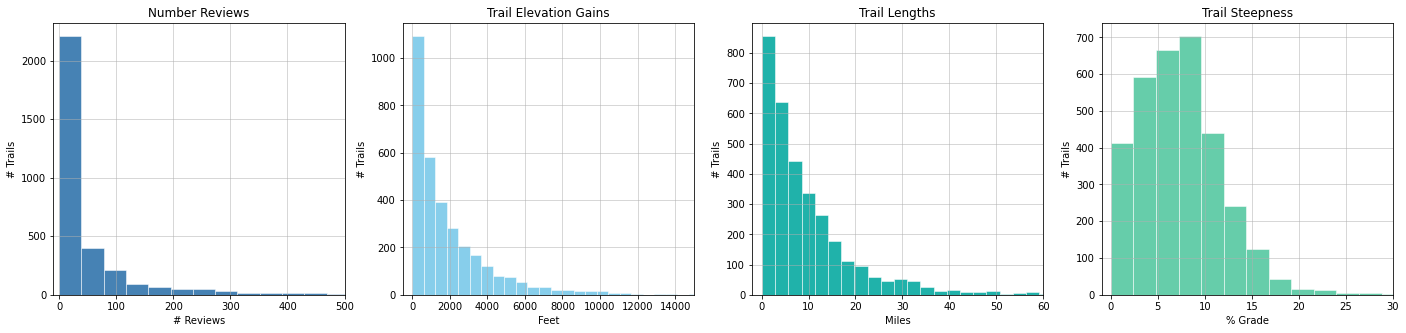

In [21]:
# Create histograms for all continuous variables: 
#  length, elevation gain, # reviews, steepness

# Color palette
colors = ['steelblue', 'skyblue', 'lightseagreen', 'mediumaquamarine',
          'lightblue', 'navy']

# Set up figure, axes
fig, axs = plt.subplots(1, 4, figsize=(24, 5))

# Distribution of number of user reviews for trails
axs[0].hist(hikes_df['# Reviews'], bins=100, linewidth=0.5, edgecolor='white',
            facecolor=colors[0])
axs[0].set(title='Number Reviews', xlim=(-10,500))
axs[0].set_xlabel('# Reviews')
axs[0].set_ylabel('# Trails')
axs[0].grid(linewidth='0.5')

# Distribution of elevation gain (feet) of trails
axs[1].hist(hikes_df['Elevation Gain (Feet)'], bins=75, linewidth=0.5,
            edgecolor='white', facecolor=colors[1])
axs[1].set(title='Trail Elevation Gains', xlim=(-500,15_000))
axs[1].set_xlabel('Feet')
axs[1].set_ylabel('# Trails')
axs[1].grid(linewidth='0.5')

# Distribution of length (miles) of trails
axs[2].hist(hikes_df['Length (Miles)'], bins=75, linewidth=0.5,
            edgecolor='white', facecolor=colors[2])
axs[2].set(title='Trail Lengths', xlim=(-2,60)) 
axs[2].set_xlabel('Miles')
axs[2].set_ylabel('# Trails')
axs[2].grid(linewidth='0.5')

# Distribution of steepness (% grade) of trails
axs[3].hist(hikes_df['Steepness (% Grade)'], bins=20, linewidth=0.5,
            edgecolor='white', facecolor=colors[3])
axs[3].set(title='Trail Steepness', xlim=(-1,30))
axs[3].set_xlabel('% Grade')
axs[3].set_ylabel('# Trails')
axs[3].grid(linewidth='0.5')

plt.show()

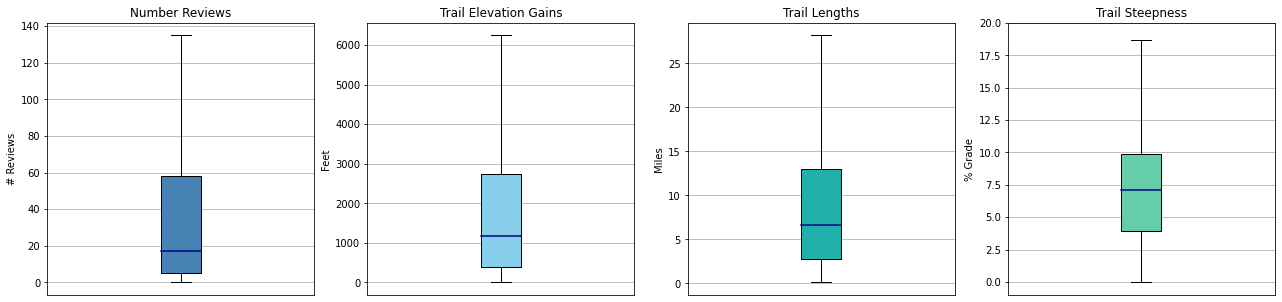

In [22]:
# Create box plots for continuous variables
#  length, elevation gain, # reviews, steepness

# Color palette
colors = ['steelblue', 'skyblue', 'lightseagreen', 'mediumaquamarine', 'lightblue', 'navy']

# Set figure, axes
fig, axs = plt.subplots(1, 4, figsize=(22, 5))

# Number of reviews for trails
axs[0].boxplot(hikes_df['# Reviews'], showfliers=False,
               patch_artist=True, boxprops=dict(facecolor=colors[0]),
               medianprops = dict(color=colors[5],linewidth=1.5))
axs[0].set(title='Number Reviews')
axs[0].set_ylabel('# Reviews')
axs[0].yaxis.grid(True)
axs[0].tick_params(axis='x', bottom=False, labelbottom=False)

# Elevation gain (feet) of trails
axs[1].boxplot(hikes_df['Elevation Gain (Feet)'], showfliers=False,
               patch_artist=True, boxprops=dict(facecolor=colors[1]),
               medianprops = dict(color=colors[5],linewidth=1.5))
axs[1].set(title='Trail Elevation Gains') 
axs[1].set_ylabel('Feet')
axs[1].yaxis.grid(True)
axs[1].tick_params(axis='x', bottom=False, labelbottom=False)

# Length (miles) of trails
axs[2].boxplot(hikes_df['Length (Miles)'], showfliers=False,
               patch_artist=True, boxprops=dict(facecolor=colors[2]),
               medianprops = dict(color=colors[5],linewidth=1.5))
axs[2].set(title='Trail Lengths') 
axs[2].set_ylabel('Miles')
axs[2].yaxis.grid(True)
axs[2].tick_params(axis='x', bottom=False, labelbottom=False)

# Steepness (% Grade) of trails
axs[3].boxplot(hikes_df['Steepness (% Grade)'], showfliers=False,
               patch_artist=True, boxprops=dict(facecolor=colors[3]),
               medianprops= dict(color=colors[5],linewidth=1.5))
axs[3].set(title='Trail Steepness', ylim=(-1,20))
axs[3].set_ylabel('% Grade')
axs[3].yaxis.grid(True)
axs[3].tick_params(axis='x', bottom=False, labelbottom=False)

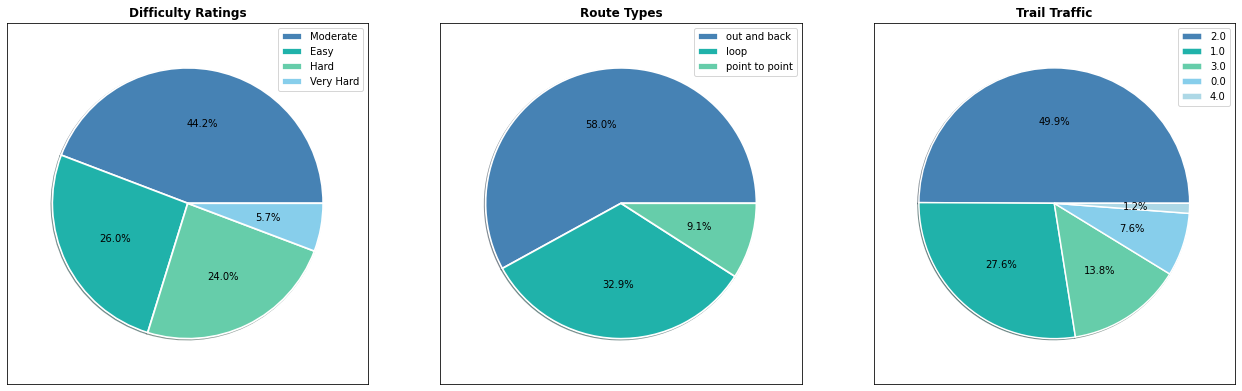

In [23]:
# Create pie charts for discrete variables: 
#  difficulty ratings, route types, trail traffic


# Color palette
colors = ['steelblue', 'lightseagreen', 'mediumaquamarine', 'skyblue', 'lightblue', 'navy']

# Define data for difficulty ratings
diff_labels = ['Moderate', 'Easy', 'Hard', 'Very Hard']
diff_values = hikes_df['Difficulty'].value_counts().values

# Define data for route types
route_labels = hikes_df['Route Type'].value_counts().index
route_values = hikes_df['Route Type'].value_counts().values

# Define data for trail traffic
traff_labels = hikes_df['Trail Traffic'].value_counts().index
traff_values = hikes_df['Trail Traffic'].value_counts().values


# Set up fig, axs for pie charts
fig, axs = plt.subplots(1, 3, figsize=(22,12))

# Pie chart of difficulty levels
axs[0].pie(diff_values, labels=diff_labels, colors=colors, radius=3,
           center=(4, 4), autopct='%1.1f%%', labeldistance=None,
           wedgeprops={"linewidth": 1.75, "edgecolor": "white"}, frame=True,
           shadow=True)
axs[0].set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))
axs[0].set_title('Difficulty Ratings', weight='bold')
axs[0].legend()
axs[0].tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)

# Pie chart of route types
axs[1].pie(route_values, labels=route_labels, colors=colors, radius=3,
           center=(4, 4), autopct='%1.1f%%', labeldistance=None,
           wedgeprops={"linewidth": 1.75, "edgecolor": "white"}, frame=True,
           shadow=True)
axs[1].set(xlim=(0, 8), xticks=np.arange(1, 8), ylim=(0, 8), yticks=np.arange(1, 8))
axs[1].set_title('Route Types', weight='bold')
axs[1].legend()
axs[1].tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)

# Pie chart of trail traffic
axs[2].pie(traff_values, labels=traff_labels, colors=colors, radius=3,
           center=(4, 4), autopct='%1.1f%%', labeldistance=None,
           wedgeprops={"linewidth": 1.5, "edgecolor": "white"}, frame=True,
           shadow=True)
axs[2].set(xlim=(0, 8), xticks=np.arange(1, 8), ylim=(0, 8), yticks=np.arange(1, 8))
axs[2].set_title('Trail Traffic', weight='bold')
axs[2].legend(loc='upper right')
axs[2].tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)


plt.show()

### **EXPLORATORY ANALYSIS**
Focus: difficulty ratings 
*   vs steepness, length, elevation, user ratings
*   across route types, states, parks

2 difficulty rating systems:
* As corresponds to displayed ratings on AllTrails app:
   *  Easy (rating=1), Moderate (rating=3), Hard (rating=5 & 7 combined)
* As corresponds to full range of ratings in dataframe ('hard' split into 2 tiers):
  *   Easy (rating=1), Moderate (rating=3), Hard (rating=5), Very Hard (rating=7)

*Explore possible correlations between:*

*   Steepness and difficulty rating
*   Elevation and difficulty rating
*   Length and difficulty rating
*   User rating and difficulty rating
*   Trail type and difficulty rating

In [24]:
# Create dfs of hikes of each difficulty rating

# As corresponds to displayed ratings on AllTrails app:
#  Easy (rating=1), Moderate (rating=3), Hard (rating=5 & 7)
easy_hikes = hikes_df[hikes_df['Difficulty'] == 1]
easy_hikes.reset_index(drop=True, inplace=True)

mod_hikes = hikes_df[hikes_df['Difficulty'] == 3]
mod_hikes.reset_index(drop=True, inplace=True)

hard_hikes = hikes_df[hikes_df['Difficulty'] >= 5]
hard_hikes.reset_index(drop=True, inplace=True)


# As corresponds to full range of ratings in df ('hard' split into 2 tiers):
#  Easy (rating=1), Moderate (rating=3), Hard (rating=5), Very Hard (rating=7)
hard_hikes_1 = hikes_df[hikes_df['Difficulty'] == 5]
hard_hikes_1.reset_index(drop=True, inplace=True)

hard_hikes_2 = hikes_df[hikes_df['Difficulty'] == 7]
hard_hikes_2.reset_index(drop=True, inplace=True)

##Bar charts of difficulty vs user rating, route type
*  Hikes per difficulty category: across 5 parks w/ highest number of trails
*  Average user rating per difficulty category: across 5 states w/ highest number of trails
*  Number of hikes in each difficulty category within each route type


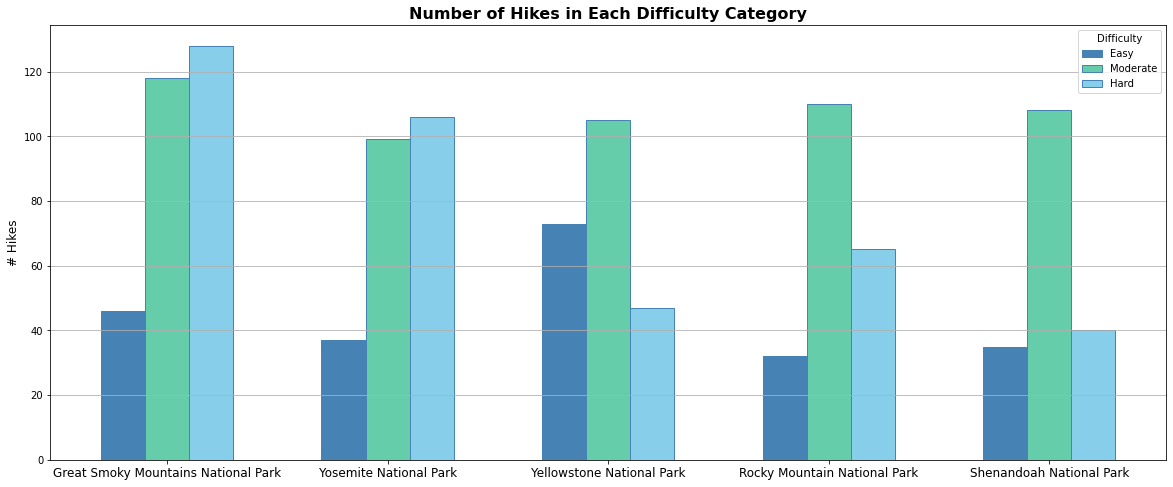

In [25]:
# Grouped bar chart comparing how many hikes per difficulty rating in each park
#  Chose the top 5 parks (that have the highest number of trails)

# Color palette
colors = ['steelblue', 'lightseagreen', 'mediumaquamarine',
          'skyblue', 'lightblue', 'navy']

# Count frequency of parks in list of hikes to determine top 5
parks = hikes_df['Park'].value_counts().index

# Labels and lists of frequencies in each difficulty level
labels = []
num_easy = []
num_mod = []
num_hard = []

# Loop through and add top 5 parks to labels list
for park in parks[:5]:
  labels.append(park)

# Loop through top 5 parks and determine frequency of difficulty ratings in each
for park in parks[:5]:
  num_hikes = easy_hikes[easy_hikes['Park']==park].value_counts().values.size
  num_easy.append(num_hikes)

for park in parks[:5]:
  num_hikes = mod_hikes[mod_hikes['Park']==park].value_counts().values.size
  num_mod.append(num_hikes)

for park in parks[:5]:
  num_hikes = hard_hikes[hard_hikes['Park']==park].value_counts().values.size
  num_hard.append(num_hikes)

# Bar settings
x = np.arange(5)
width = 0.2

# Make grouped bar chart showing 3 difficulty levels in each park
fig, ax = plt.subplots(figsize=(20, 8))
rects1 = ax.bar(x - width/2, num_easy, width, label='Easy', color=colors[0],
                edgecolor=colors[0], linewidth=1)
rects2 = ax.bar(x + width/2, num_mod, width, label='Moderate', color=colors[2],
                edgecolor=colors[0], linewidth=1)
rects3 = ax.bar(x + width + width/2, num_hard, width, label='Hard',
                color=colors[3], edgecolor=colors[0], linewidth=1)

# Set title, labels, legend
ax.set_title('Number of Hikes in Each Difficulty Category', fontsize=16,
             fontweight='bold')
ax.set_ylabel('# Hikes', fontsize=12)
ax.yaxis.grid(True)
ax.set_xticks(x + width/2)
ax.set_xticklabels(labels, fontsize=12)
ax.legend(title='Difficulty')

plt.show()

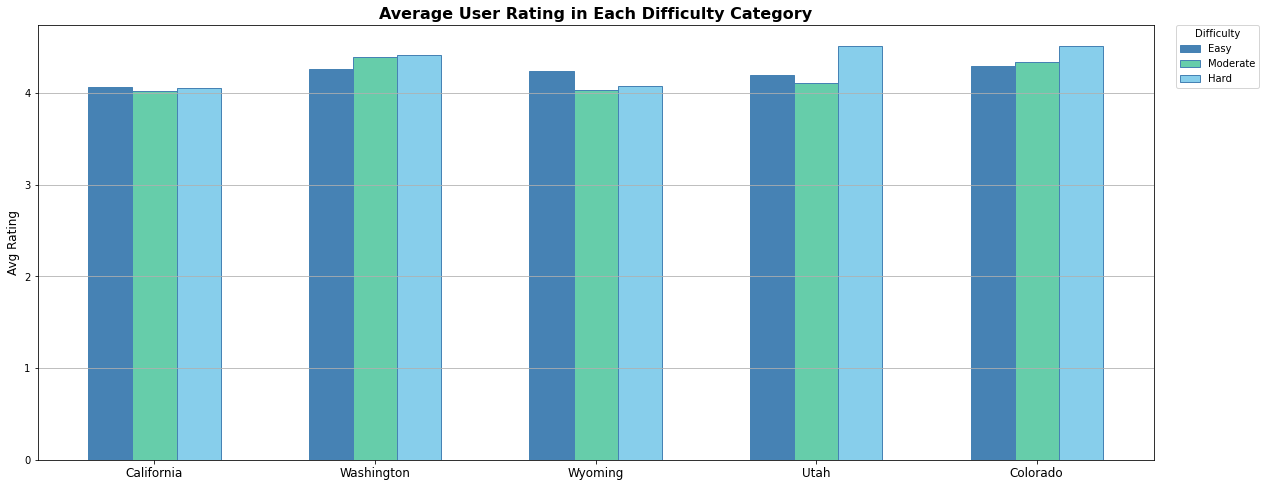

In [26]:
# Grouped bar chart comparing avg user rating per difficulty rating (in each state)
#  Chose the top 5 states (that have the highest number of trails)

# Color palette
colors = ['steelblue', 'lightseagreen', 'mediumaquamarine',
          'skyblue', 'lightblue', 'navy']

# Count frequency of parks in list of hikes to determine top 5
states = hikes_df['State'].value_counts().index

# Labels and lists of average user ratings in each difficulty level
labels = []
avg_easy = []
avg_mod = []
avg_hard = []

# Loop through and add top 5 states to labels list
for state in states[:5]:
  labels.append(state)

# Loop through top 5 states and determine average user rating 
#  within each difficulty rating in each state
for state in states[:5]:
  easy_state = easy_hikes[easy_hikes['State']==state]
  easy_state.reset_index(drop=True, inplace=True)

  avg_hikes = easy_state['Avg Rating'].mean()
  avg_easy.append(avg_hikes)

for state in states[:5]:
  mod_state = mod_hikes[mod_hikes['State']==state]
  mod_state.reset_index(drop=True, inplace=True)

  avg_hikes = mod_state['Avg Rating'].mean()
  avg_mod.append(avg_hikes)

for state in states[:5]:
  hard_state = hard_hikes[hard_hikes['State']==state]
  hard_state.reset_index(drop=True, inplace=True)

  avg_hikes = hard_state['Avg Rating'].mean()
  avg_hard.append(avg_hikes)

# Bar settings
x = np.arange(5)
width = 0.2

# Make grouped bar chart showing 3 difficulty levels in each park
fig, ax = plt.subplots(figsize=(20, 8))
rects1 = ax.bar(x - width/2, avg_easy, width, label='Easy', color=colors[0],
                edgecolor=colors[0], linewidth=1)
rects2 = ax.bar(x + width/2, avg_mod, width, label='Moderate', color=colors[2],
                edgecolor=colors[0], linewidth=1)
rects3 = ax.bar(x + width + width/2, avg_hard, width, label='Hard',
                color=colors[3], edgecolor=colors[0], linewidth=1)

# Set title, labels, legend
ax.set_title('Average User Rating in Each Difficulty Category', fontsize=16,
             fontweight='bold')
ax.set_ylabel('Avg Rating', fontsize=12)
ax.yaxis.grid(True)
ax.set_xticks(x + width/2)
ax.set_xticklabels(labels, fontsize=12)
ax.legend(title='Difficulty', bbox_to_anchor=(1.02, 1), loc='upper left',
          borderaxespad=0)

plt.show()

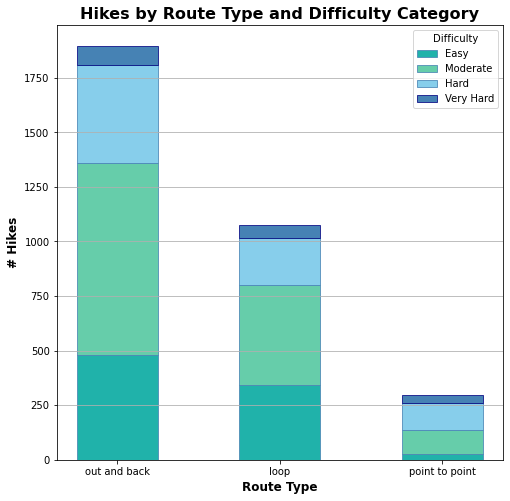

In [27]:
# Create stacked bar graph of difficulty (4 levels) in each route type

# Color palette
colors = ['steelblue', 'lightseagreen', 'mediumaquamarine',
          'skyblue', 'lightblue', 'navy']

# Count frequency of route types in each df of hikes
easy_routes = easy_hikes['Route Type'].value_counts().index
easy_counts = easy_hikes['Route Type'].value_counts().values

mod_routes = mod_hikes['Route Type'].value_counts().index
mod_counts = mod_hikes['Route Type'].value_counts().values

hard1_routes = hard_hikes_1['Route Type'].value_counts().index
hard1_counts = hard_hikes_1['Route Type'].value_counts().values

hard2_routes = hard_hikes_2['Route Type'].value_counts().index
hard2_counts = hard_hikes_2['Route Type'].value_counts().values


# Set figure and axes
fig, ax = plt.subplots(figsize=(8, 8))

# Set levels to display each of 4 difficulty ratings
ax.bar(easy_routes, easy_counts, label='Easy', color=colors[1], width=0.5,
       edgecolor=colors[0], linewidth=0.75)

ax.bar(mod_routes, mod_counts, bottom=easy_counts, label='Moderate', 
       color=colors[2], width=0.5, edgecolor=colors[0], linewidth=0.75)

ax.bar(hard1_routes, hard1_counts, bottom=(mod_counts+easy_counts),label='Hard', 
       color=colors[3], width=0.5, edgecolor=colors[0], linewidth=0.75)

ax.bar(hard2_routes, hard2_counts, bottom=(mod_counts+easy_counts+hard1_counts), 
       label='Very Hard', color=colors[0], width=0.5, edgecolor=colors[5],
       linewidth=0.75)

# Set title, labels, legend
ax.set_title('Hikes by Route Type and Difficulty Category', fontsize=16,
             fontweight='bold')
ax.set_xlabel('Route Type', fontsize=12, fontweight='bold')
ax.set_ylabel('# Hikes', fontsize=12, fontweight='bold')
ax.yaxis.grid(True)
ax.tick_params(axis='x')
ax.legend(title='Difficulty')

plt.show()

##Sets of box and whisker plots for trail lengths, elevation gain and steepness in each difficulty category

(comparing AllTrails (3 categories) to data-based (4 categories) ratings systems)

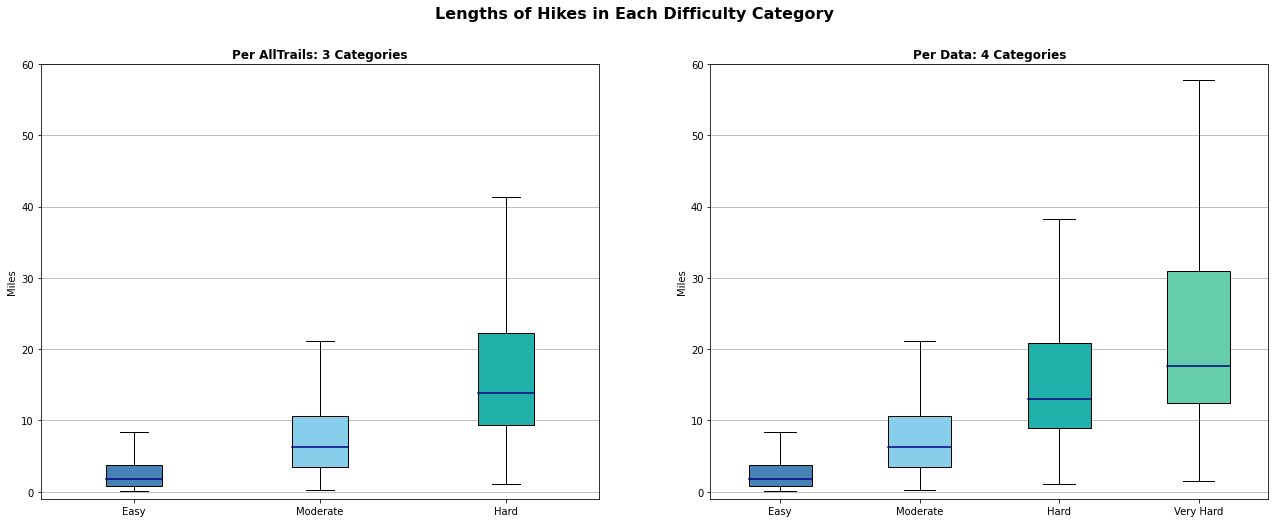

In [28]:
# Box and whisker plot for trail lengths in each difficulty category:
#  as listed on AllTrails (3 categories) vs. as listed in df (4 categories)

# Lists of hike difficulty df's to graph and corresponding labels
hikes_diffs = np.array([easy_hikes['Length (Miles)'],
                        mod_hikes['Length (Miles)'], 
                        hard_hikes['Length (Miles)'],
                        hard_hikes_1['Length (Miles)'],
                        hard_hikes_2['Length (Miles)']], dtype=object)
diff_labels = ['Easy', 'Moderate', 'Hard', 'Very Hard']

# Color palette
colors = ['steelblue', 'skyblue', 'lightseagreen', 'mediumaquamarine',
          'lightblue', 'navy']

# Set up figure, axes
fig, axs = plt.subplots(1,2, figsize=(22,8))
fig.suptitle("Lengths of Hikes in Each Difficulty Category",
             fontsize=16, weight='bold')

# Lengths for hikes in each difficulty category 
#  (3 categories as displayed on the AllTrails app)
bplot1 = axs[0].boxplot(hikes_diffs[:3], labels=diff_labels[:3], 
               showfliers=False, patch_artist=True, 
               medianprops = dict(color=colors[5],linewidth=1.5))
axs[0].yaxis.grid(True)
axs[0].set(ylabel='Miles', ylim=(-1,60))
axs[0].set_title('Per AllTrails: 3 Categories',
                 weight='bold')

# Lengths for hikes in each difficulty category 
#  (4 categories as defined in data)
bplot2 = axs[1].boxplot(np.concatenate([hikes_diffs[:2], hikes_diffs[-2:]]),
                        labels=diff_labels, showfliers=False, patch_artist=True, 
                        medianprops = dict(color=colors[5],linewidth=1.5))
axs[1].yaxis.grid(True)
axs[1].set(ylabel='Miles', ylim=(-1,60))
axs[1].set_title('Per Data: 4 Categories',
                 weight='bold')

# Set colors for boxes
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

plt.show()

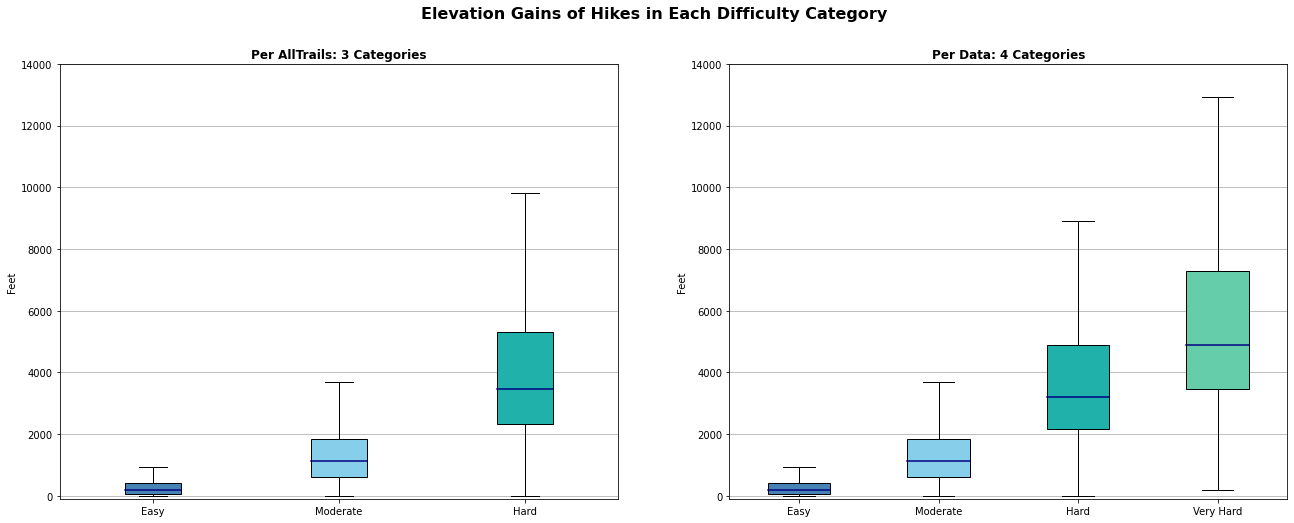

In [29]:
# Box and whisker plot for trail elevation gains in each difficulty category
#  as listed on AllTrails (3 categories) vs. as listed in df (4 categories)

# Lists of hike difficulty df's to graph and corresponding labels
hikes_diffs = np.array([easy_hikes['Elevation Gain (Feet)'],
               mod_hikes['Elevation Gain (Feet)'],
               hard_hikes['Elevation Gain (Feet)'],
               hard_hikes_1['Elevation Gain (Feet)'],
               hard_hikes_2['Elevation Gain (Feet)']], dtype=object)
diff_labels = ['Easy', 'Moderate', 'Hard', 'Very Hard']

# Color palette
colors = ['steelblue', 'skyblue', 'lightseagreen', 'mediumaquamarine',
          'lightblue', 'navy']

# Set up figure, axes
fig, axs = plt.subplots(1,2, figsize=(22,8))
fig.suptitle("Elevation Gains of Hikes in Each Difficulty Category",
             fontsize=16, weight='bold')

# Elevation gains for hikes in each difficulty category 
#   (3 categories as displayed on the AllTrails app)
bplot1 = axs[0].boxplot(hikes_diffs[:3], labels=diff_labels[:3],
                        showfliers=False, patch_artist=True,
                        medianprops = dict(color=colors[5],linewidth=1.5))
axs[0].yaxis.grid(True)
axs[0].set(ylabel='Feet', ylim=(-100,14_000))
axs[0].set_title('Per AllTrails: 3 Categories', weight='bold')

# Elevation gains for hikes in each difficulty category
#  (4 categories as defined in data)
bplot2 = axs[1].boxplot(np.concatenate([hikes_diffs[:2], hikes_diffs[-2:]]),
                        labels=diff_labels, showfliers=False, patch_artist=True,
                        medianprops = dict(color=colors[5],linewidth=1.5))
axs[1].yaxis.grid(True)
axs[1].set(ylabel='Feet', ylim=(-100,14_000))
axs[1].set_title('Per Data: 4 Categories', weight='bold')

# Set colors for boxes
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

plt.show()

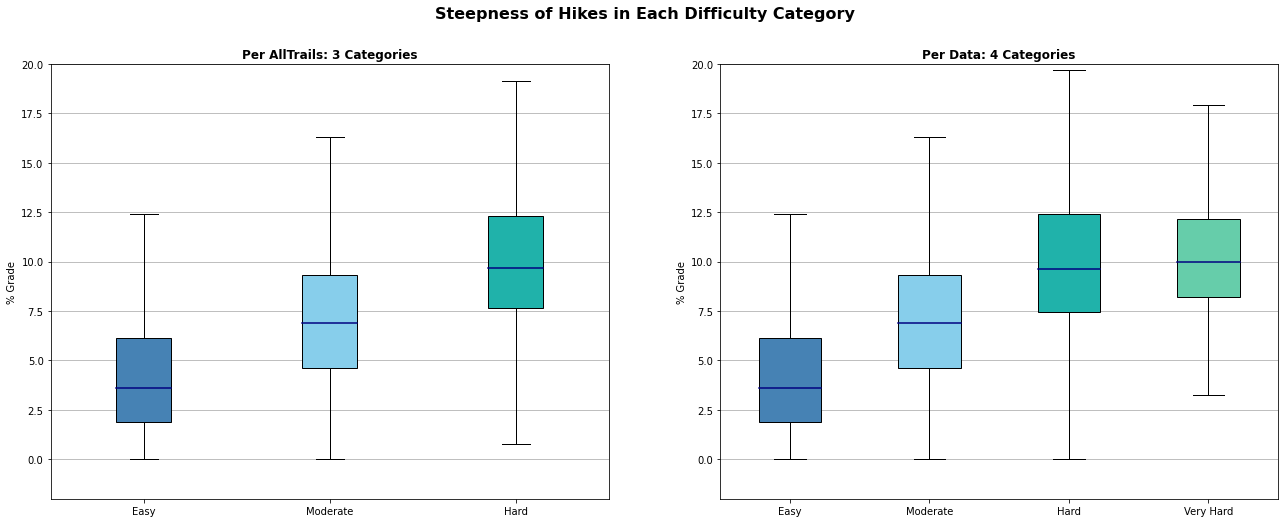

In [30]:
# Box and whisker plot for steepness (% grade) in each difficulty category
#  as listed on AllTrails (3 categories) vs. as listed in df (4 categories)

# Lists of hike difficulty df's to graph and corresponding labels
hikes_diffs = np.array([easy_hikes['Steepness (% Grade)'],
               mod_hikes['Steepness (% Grade)'],
               hard_hikes['Steepness (% Grade)'],
               hard_hikes_1['Steepness (% Grade)'],
               hard_hikes_2['Steepness (% Grade)']], dtype=object)
diff_labels = ['Easy', 'Moderate', 'Hard', 'Very Hard']

# Color palette
colors = ['steelblue', 'skyblue', 'lightseagreen', 'mediumaquamarine',
          'lightblue', 'navy']

# Set figure, axes
fig, axs = plt.subplots(1,2, figsize=(22,8))
fig.suptitle("Steepness of Hikes in Each Difficulty Category", fontsize=16,
             weight='bold')

# Steepness for hikes in each difficulty category 
#   (3 categories as defined per AllTrails app)
bplot1 = axs[0].boxplot(hikes_diffs[:3], labels=diff_labels[:3],
                        showfliers=False, patch_artist=True,
                        medianprops = dict(color=colors[5],linewidth=1.5))
axs[0].yaxis.grid(True)
axs[0].set(ylabel='% Grade', ylim=(-2,20))
axs[0].set_title('Per AllTrails: 3 Categories', weight='bold')

# Steepness for hikes in each difficulty category
#  (4 categories as defined per data)
bplot2 = axs[1].boxplot(np.concatenate([hikes_diffs[:2], hikes_diffs[-2:]]), 
                        labels=diff_labels, showfliers=False, patch_artist=True,
                        medianprops = dict(color=colors[5],linewidth=1.5))
axs[1].yaxis.grid(True)
axs[1].set(ylabel='% Grade', ylim=(-2,20))
axs[1].set_title('Per Data: 4 Categories', weight='bold')

# Set colors for boxes
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

plt.show()